# Recurrent Neural Network
RNN by keras  
reference: https://qiita.com/yukiB/items/5d5b202af86e3c587843

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

/Users/fkiyozawa/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/fkiyozawa/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
# create data
def f(x):
    return np.sin(x)

def make_data(x, f, ep):
    return f(x) + np.random.normal(0, ep, x.shape[0])

In [3]:
x = np.arange(0, 100, 0.1)
y = make_data(x, f, 0.05)

(0, 13)

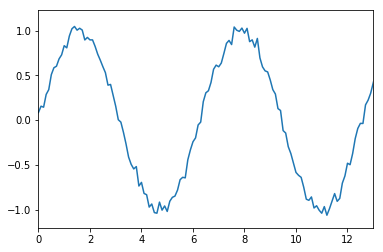

In [4]:
plt.plot(x, y)
plt.xlim([0, 13])

In [5]:
# train data
t_size = 100
x_train = []
y_train = []
for i in range(0, 700):
    x_train.append(y[i: i+t_size])
    y_train.append(y[i+t_size])
x_train = np.array(x_train).reshape(700, t_size, 1)
y_train = np.array(y_train).reshape(700, 1)
print(x_train.shape)
print(y_train.shape)

(700, 100, 1)
(700, 1)


In [6]:
# test data
x_test = []
y_test = []
for i in range(700, 900):
    x_test.append(y[i: i+t_size])
    y_test.append(y[i+t_size])
x_test = np.array(x_test).reshape(200, t_size, 1)
y_test = np.array(y_test).reshape(200, 1)
print(x_test.shape)
print(y_test.shape)

(200, 100, 1)
(200, 1)


In [7]:
# define model
model = Sequential()
model.add(LSTM(300, batch_input_shape=(None, 100, 1), return_sequences=False))
model.add(Dense(1))
model.add(Activation("linear"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [9]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.1)

Train on 630 samples, validate on 70 samples
Epoch 1/10
630/630 [==============================] - 4s 6ms/step - loss: 0.2858 - mean_absolute_error: 0.4721 - val_loss: 0.0616 - val_mean_absolute_error: 0.2197
Epoch 2/10
630/630 [==============================] - 3s 5ms/step - loss: 0.0253 - mean_absolute_error: 0.1334 - val_loss: 0.0279 - val_mean_absolute_error: 0.1417
Epoch 3/10
630/630 [==============================] - 3s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0879 - val_loss: 0.0117 - val_mean_absolute_error: 0.0916
Epoch 4/10
630/630 [==============================] - 3s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0834 - val_loss: 0.0074 - val_mean_absolute_error: 0.0662
Epoch 5/10
630/630 [==============================] - 3s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0630 - val_loss: 0.0051 - val_mean_absolute_error: 0.0577
Epoch 6/10
630/630 [==============================] - 3s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0595 - val_loss: 0.0054 - val

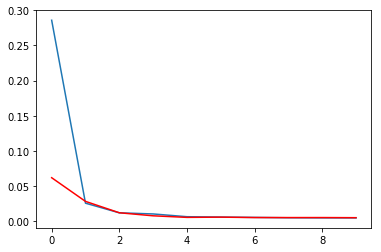

In [10]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'])
plt.plot(np.arange(0, len(history.history['loss'])), history.history['val_loss'], color='red')

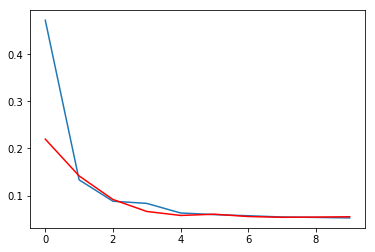

In [11]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['mean_absolute_error'])
plt.plot(np.arange(0, len(history.history['loss'])), history.history['val_mean_absolute_error'], color='red')

In [12]:
prediction = model.predict(x_test)

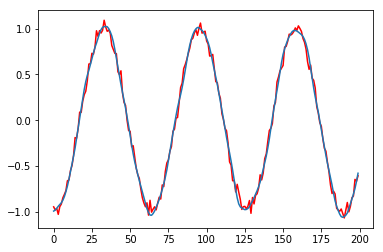

In [13]:
plt.plot(np.arange(0, len(prediction)), y_test, color='red')
plt.plot(np.arange(0, len(prediction)), prediction)
#plt.xlim([0, 1000])

In [14]:
# prediction for all data
xp = np.arange(0, 10, 0.1)
yp = make_data(xp, f, 0.1)
model.predict(yp.reshape(1, 100, 1))

array([[-0.3592415]], dtype=float32)

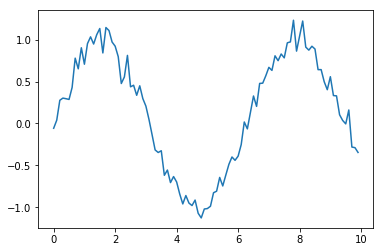

In [15]:
plt.plot(xp, yp)

In [16]:
xd = []
for i in range(0, 500):
    xt = model.predict(yp.reshape(1, 100, 1))
    xd.append(xt[0][0])
    yp = yp[1:]
    yp = np.append(yp, xt[0])

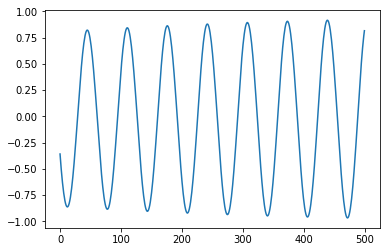

In [17]:
plt.plot(np.arange(0, len(xd)), xd)